In [64]:
import numpy as np
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]
#从文档中读取数据，x是年份、t是百米时间

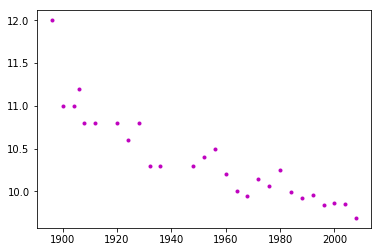

In [65]:
import pylab as plt
%matplotlib inline
plt.plot(x,t,'.m')
#对初始数据绘图直观感受整体趋势，其中横轴为年份x,纵轴为百米时间t，图样为“.”黑点“m”紫红色

In [66]:
#预先计算的均值
x_bar = x.mean()#计算年份时间的均值
t_bar = t.mean()#计算历年比赛成绩的均值
xx_bar = np.multiply(x,x).mean()#计算年份平方的均值
x_t_bar = np.multiply(x,t).mean()#计算年份乘以成绩的积的均值
print("年份均值为：",x_bar)
print("历年比赛成绩的均值为:",t_bar)
print("年份平方的均值为:",xx_bar)
print("年份乘以成绩的积的均值为：",x_t_bar)

年份均值为： 1952.3703703703704
历年比赛成绩的均值为: 10.389629629629631
年份平方的均值为: 3812975.5555555555
年份乘以成绩的积的均值为： 20268.06814814815


In [67]:
w1 = (t_bar*x_bar - x_t_bar)/(x_bar*x_bar - xx_bar)#计算w1的值
w0 = t_bar-w1*x_bar#计算w0的值
#先计算w1在计算w0计算上较为方便
print("w0=",w0)
print("w1=",w1)

w0= 36.41645590250286
w1= -0.013330885710960602


Text(0,0.5,'Winning time (s)')

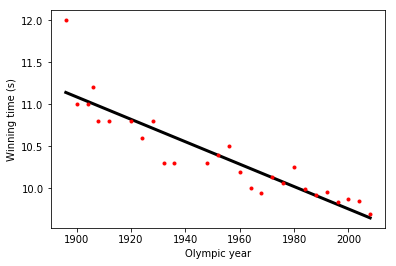

In [68]:
#画出建立的方程模型图像和散点图的图像，进行对比
x_test = np.linspace(1896,2008,100)[:,None]#在文档中读取x的值
f_test = w0+w1*x_test#预测之后的t值由得到的公式计算得出
plt.plot(x_test,f_test,'k-',linewidth=3)#画预测直线，其中linewidth为线宽
plt.plot(x,t,'.r')#画原始数据分布
plt.xlabel('Olympic year')#横轴
plt.ylabel('Winning time (s)')#纵轴

In [69]:
#由公式预测2020年百米成绩
x_pre=2020
f_pre = w0+w1*x_pre
print("2020年男子百米成绩预测值为：",f_pre)

2020年男子百米成绩预测值为： 9.488066766362444


In [70]:
#五阶，并且惩罚系数为为0.01的模型
maxorder = 5
X = np.ones_like(x)
X_test = np.ones_like(x_test) #np.ones_like 所有元素用1代替
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i)) #hstack  按列归结  
    X_test = np.hstack((X_test,x_test**i))

[[ 1.70491772e-06]
 [ 7.02739852e-04]
 [ 6.39681688e-03]
 [-9.74788400e-06]
 [ 4.95518897e-09]
 [-8.39961841e-13]]


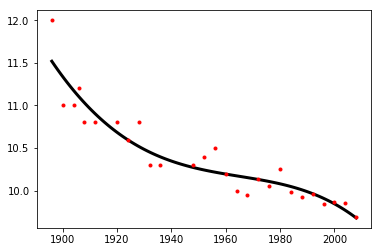

In [71]:
#高阶模型
lamb = 0.01#惩罚系数
w = np.linalg.solve(np.dot(X.T,X) + x.size*lamb*np.identity(maxorder+1),np.dot(X.T,t))
#调用linalg模块的solve模块对方程求解，dot()求矩阵积
#np.linalg.solve求线性函数 ，x.size是N，identity单位矩阵
f_test = np.dot(X_test,w)
plt.plot(x_test,f_test,'k-',linewidth=3)
plt.plot(x,t,'.r')
print(w)#w为向量所以输出也是一个向量值

In [72]:
#用此模型预测2020奥运会的成绩
x = 2020
y = w[0]+w[1]*x+w[2]*x**2+w[3]*x**3+w[4]*x**4+w[5]*x**5#此时的y是个向量也即是一个列表，下面可以用y[0]取出
print("2020百米预测成绩为：",y[0])

2020百米预测成绩为： 9.31949390903901
